In [394]:
import numpy as np
#import matplotlib
#matplotlib.use('Agg');
import matplotlib.pyplot as plt
#plt.set_cmap('jet');
import random, os, sys, pandas, os, pickle
import argparse
from textwrap import wrap
%matplotlib inline
import glob

In [353]:
##############################################
##############################################
##############################################
##############################################
## below is code to plot the results of running this with "run.sh classify.ipynb"
## e.g "run.sh classify.ipynb -thing -nsamples 32 -seed 4"
## it writes a pickle file with the results for each run.


In [276]:
#glob.glob("../logs/*/*/*.pkl")

compare_set = [
#                '-323006273202644676', # diff_from_ref old
#                '3346739109646000393',
#                '-2980223164802293720',
#                '1068970133720981913',
#                '-6568905041232578890',
               '-1272870893705969159', # diff_from_ref new
               '-483284988515987888',
               '-4938792663839371264',
               '5842813419559650543',
               '8960496012100644352',
               '5583628637444149587', # contrast
               '7421362752098416771', 
               '-4053750372853745729',
               '7048771953513505093',
               '8924452422604827946',
               '-6466492867607361210', # False
               '-4732692411152734739',
               '2736766679018947954',
               '8418867155420944351',
               '-853825128667051477'
              ]

In [426]:
ddf = pandas.DataFrame()
# for fn in compare_set:
#     print(fn)
for f in glob.glob("../logs/*/*/*.pkl"):
    #print(f)
    d = (pickle.load(open(f,"rb")))
    ddf = ddf.append(pandas.DataFrame(d))

In [427]:
df = ddf.copy()

In [428]:
df.shape

(2600, 39)

In [313]:
print(df['penalise_grad'].iloc[0], df['seed'].iloc[0], df['nsamples_train'].iloc[0])

False 0 64


In [44]:
df.columns

Index(['batch_size', 'conditional_reg', 'cuda', 'epoch', 'manager',
       'manager_name', 'manager_uri', 'maxmasks_train', 'model',
       'model_flat_layer', 'n_iter', 'nsamples_train', 'num_epochs',
       'optimizer', 'optimizer_lr', 'penalise_grad', 'penalise_grad_lambda_1',
       'penalise_grad_lambda_2', 'penalise_grad_usemask',
       'penalise_grad_usemasks', 'seed', 'shuffle', 'skopt', 'test_dataset',
       'test_dataset_mode', 'test_dataset_nsamples', 'testauc',
       'testauc_for_best_validauc', 'train_dataset', 'train_dataset_blur',
       'train_dataset_maxmasks', 'train_dataset_mode',
       'train_dataset_nsamples', 'trainloss', 'transform', 'valid_dataset',
       'valid_dataset_mode', 'valid_dataset_nsamples', 'validauc'],
      dtype='object')

In [62]:
# del df["optimizer"]
# del df["train_dataset_blur"]
del df["model_flat_layer"]
del df["transform"]
del df["cuda"]

In [12]:
for i in df.columns:
    if "valid_dataset" in i:
        print (i)
        del df[i]
    if "test_dataset" in i:
        print (i)
        del df[i]
    if "train_dataset_" in i:
        print(i)
        del df[i]

test_dataset
test_dataset_mode
test_dataset_nsamples
train_dataset_blur
train_dataset_maxmasks
train_dataset_mode
train_dataset_nsamples
valid_dataset
valid_dataset_mode
valid_dataset_nsamples


In [47]:
print (df.train_dataset.unique())
print (df.penalise_grad.unique())
# print (df.train_dataset_nsamples.unique())
# print (df.train_dataset_maxmasks.unique())
print (df.optimizer_lr.unique())

['LungMSDDataset']
['contrast' 'diff_from_ref']
[0.0003 0.0007 0.001  0.0011 0.0009 0.0014 0.0063 0.0036]


In [17]:
df = df[(df.nsamples == 64) & (df.optimizer_lr==0.0001)]

AttributeError: 'DataFrame' object has no attribute 'nsamples'

In [312]:
df.head(10)

,batch_size,conditional_reg,cuda,epoch,manager,manager_name,manager_uri,maxmasks_train,model,model_flat_layer,...,train_dataset_blur,train_dataset_maxmasks,train_dataset_mode,train_dataset_nsamples,trainloss,transform,valid_dataset,valid_dataset_mode,valid_dataset_nsamples,validauc
0,32,False,True,0,set_tracking_uri,NaN,,256,SimpleCNN,6,...,5,256,train,256,10.731627,test,LungMSDDataset,valid,256,0.468750
1,32,False,True,1,set_tracking_uri,NaN,,256,SimpleCNN,6,...,5,256,train,256,0.754945,test,LungMSDDataset,valid,256,0.480469
2,32,False,True,2,set_tracking_uri,NaN,,256,SimpleCNN,6,...,5,256,train,256,0.665685,test,LungMSDDataset,valid,256,0.562500
3,32,False,True,3,set_tracking_uri,NaN,,256,SimpleCNN,6,...,5,256,train,256,0.657413,test,LungMSDDataset,valid,256,0.609375
4,32,False,True,4,set_tracking_uri,NaN,,256,SimpleCNN,6,...,5,256,train,256,0.646506,test,LungMSDDataset,valid,256,0.625000
5,32,False,True,5,set_tracking_uri,NaN,,256,SimpleCNN,6,...,5,256,train,256,0.620997,test,LungMSDDataset,valid,256,0.648438
6,32,False,True,6,set_tracking_uri,NaN,,256,SimpleCNN,6,...,5,256,train,256,0.647222,test,LungMSDDataset,valid,256,0.613281
7,32,False,True,7,set_tracking_uri,NaN,,256,SimpleCNN,6,...,5,256,train,256,0.612590,test,LungMSDDataset,valid,256,0.589844
8,32,False,True,8,set_tracking_uri,NaN,,256,SimpleCNN,6,...,5,256,train,256,0.647646,test,LungMSDDataset,valid,256,0.628906
9,32,False,True,9,set_tracking_uri,NaN,,256,SimpleCNN,6,...,5,256,train,256,0.612899,test,LungMSDDataset,valid,256,0.574219


In [115]:
#df[(df.nsamples == 64)]


In [430]:
df[(df.epoch==99)].groupby(["penalise_grad","conditional_reg","epoch", "seed", "train_dataset_nsamples"]).mean()

batch_size  \
penalise_grad conditional_reg epoch seed train_dataset_nsamples               
False         False           99    0    128                             32   
                                    1    128                             32   
                                    2    128                             32   
                                    3    128                             32   
                                    4    128                             32   
                                    5    128                             32   
                                    6    128                             32   
                                    7    128                             32   
                                    9    128                             32   
contrast      False           99    1    128                             32   
                                    2    128                             32   
                                    3    128                             32   
                                    4    128                             32   
                                    5    128                             32   
                                    6    128                             32   
                                    7    128                             32   
                                    8    128                             32   
                                    9    128                             32   
diff_from_ref False           99    0    128                             32   
                                    1    128                             32   
                                    2    128                             32   
                                    3    128                             32   
                                    5    128                             32   
                                    6    128                             32   
                                    7    128                             32   
                                    9    128                             32   

                                                                 cuda  \
penalise_grad conditional_reg epoch seed train_dataset_nsamples         
False         False           99    0    128                     True   
                                    1    128                     True   
                                    2    128                     True   
                                    3    128                     True   
                                    4    128                     True   
                                    5    128                     True   
                                    6    128                     True   
                                    7    128                     True   
                                    9    128                     True   
contrast      False           99    1    128                     True   
                                    2    128                     True   
                                    3    128                     True   
                                    4    128                     True   
                                    5    128                     True   
                                    6    128                     True   
                                    7    128                     True   
                                    8    128                     True   
                                    9    128                     True   
diff_from_ref False           99    0    128                     True   
                                    1    128                     True   
                                    2    128                     True   
                                    3    128                     True   
                                    5    128                     True   
                           

In [431]:
df = df.loc[((df['seed'] >= 1) & (df['seed'] <=3)) | ((df['seed'] >= 5) & (df['seed'] <=7) | (df['seed'] == 9)) & (df['train_dataset_nsamples'] == 128)]

In [432]:
df[(df.epoch==99)].groupby(["penalise_grad"])[["testauc_for_best_validauc"]].count()

,testauc_for_best_validauc
penalise_grad,
False,7
contrast,7
diff_from_ref,7


In [350]:
df[(df['seed'] == 0) & (df['conditional_reg'] == True)].shape

(200, 39)

In [433]:
qq = df[(df.epoch==99)].groupby(["penalise_grad", "conditional_reg"])[["testauc_for_best_validauc"]]
q = qq.mean().join(qq.std(),rsuffix='_std')

q = q.join(qq.count(),rsuffix='_count')
q

,,testauc_for_best_validauc,testauc_for_best_validauc_std,testauc_for_best_validauc_count
penalise_grad,conditional_reg,,,
False,False,0.625000,0.052987,7
contrast,False,0.640625,0.059669,7
diff_from_ref,False,0.622768,0.044358,7


In [297]:
df.shape

(1500, 39)

In [872]:
#subsetdata[subsetdata.penalise_grad == "diff_from_ref"].groupby("seed").count()

False num trials 7
contrast num trials 7
diff_from_ref num trials 7


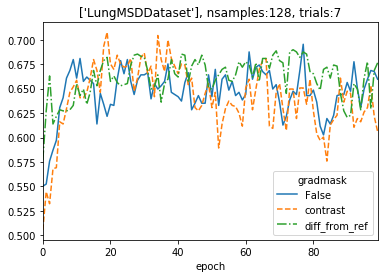

In [434]:
fig, ax = plt.subplots()
ls = ['solid', 'dashed', 'dashdot', 'dotted', '-' ,'--' ,'-.' , ':','None' ,' ' ,'' ]

# subsetdata = df.reindex()
# for k,i in enumerate(sorted(subsetdata.penalise_grad.unique())):

#     thisdata = subsetdata[(subsetdata.penalise_grad == i) & (subsetdata.conditional_reg == False)]
#     willplot = thisdata.groupby(["epoch"]).mean()
#     r = willplot.plot(y="validauc", ax=ax, label=str(i), ls=ls[k])
#     print (i, "num trials", thisdata.groupby(["epoch"]).count().min()[0])
#     plt.legend(title="gradmask")
# #plt.ylim(.5, 0.85);
# #plt.xlim(0,500);

# plt.title(str(subsetdata.train_dataset.unique()) + ", nsamples:" + str(thisdata.test_dataset_nsamples.unique()[0]) + 
#           ", trials:" + str(thisdata.seed.unique().shape[0]));
# plt.show()

#plt.figure()
subsetdata = df.reindex()
for k,i in enumerate(sorted(subsetdata.penalise_grad.unique())):
#     for cr in [True, False]:
#         if i != 'False':
#             thisdata = subsetdata[(subsetdata.penalise_grad == i) & (subsetdata.conditional_reg == cr)]
#             willplot = thisdata.groupby(["epoch"]).mean()
#             r = willplot.plot(y="validauc", ax=ax, label=str(i)+" - cond_reg="+str(cr), ls=ls[k])
#             print (i, "num trials", thisdata.groupby(["epoch"]).count().min()[0])
#             plt.legend(title="gradmask")
#         else:
#             if cr == False:
    thisdata = subsetdata[subsetdata.penalise_grad == i]
    willplot = thisdata.groupby(["epoch"]).mean()
    r = willplot.plot(y="validauc", ax=ax, label=str(i), ls=ls[k])
    print (i, "num trials", thisdata.groupby(["epoch"]).count().min()[0])
    plt.legend(title="gradmask")
        
#plt.ylim(.5, 0.85);
#plt.xlim(0,500);

plt.title(str(subsetdata.train_dataset.unique()) + ", nsamples:" + str(thisdata.test_dataset_nsamples.unique()[0]) + 
          ", trials:" + str(thisdata.seed.unique().shape[0]));

In [ ]:
fig, ax = plt.subplots()
ls = ['solid', 'dashed', 'dashdot', 'dotted', '-' ,'--' ,'-.' , ':','None' ,' ' ,'' ]

subsetdata = df[df.penalise_grad=="diff_from_ref"].reindex()
for k,i in enumerate(sorted(subsetdata.conditional_reg.unique())):

    thisdata = subsetdata[subsetdata.conditional_reg == i]
    willplot = thisdata.groupby(["epoch"]).mean()
    r = willplot.plot(y="testauc", ax=ax, label=str(i), ls=ls[k])
    print (i, "num trials", thisdata.groupby(["epoch"]).count().min()[0])
    plt.legend(title="conditional_reg")
#plt.ylim(.5, 0.85);
#plt.xlim(0,500);

plt.title(str(subsetdata.train_dataset.unique()) + ", nsamples:" + str(thisdata.nsamples.unique()[0]) + 
          ", trials:" + str(thisdata.seed.unique().shape[0]));


In [623]:
#"num trials", subsetdata[subsetdata.thing == False].groupby(["epoch"]).count()

AttributeError: 'DataFrame' object has no attribute 'maskblur'

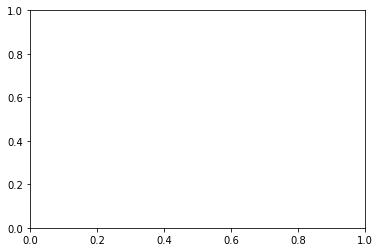

In [402]:
fig, ax = plt.subplots()
ls = ['solid', 'dashed', 'dashdot', 'dotted', '-' ,'--' ,'-.' , ':','None' ,' ' ,'' ]

subsetdata = df[(df.nsamples == 32) & 
              (df.maskblur == 3) & 
              (df.batchsize == 16) & 
              (df.annealinglambda == 1.0) & 
              (df.thingstyle == 1.0) & 
              (df.epoch < 800) &
              (df.dataset == "tnt")].reindex()
for k,i in enumerate(sorted(subsetdata.maxmasks.unique())):

    thisdata = subsetdata[subsetdata.maxmasks == i]
    r = thisdata.groupby(["epoch"]).mean().plot(
        y="validauc", ax=ax, label=str(i), ls=ls[k])
    print (i, "num trials", thisdata.groupby(["epoch"]).count().min()[0])
    plt.legend(title="# masks used")
plt.ylim(.55, 0.81);
#plt.xlim(0,500);

params = subsetdata.drop(["trainloss", "validauc", "seed", "epoch"], axis=1).iloc[0].to_dict()
params = "\n".join(wrap(str(params), 60))
plt.title(str(params) + ", trials:" + str(thisdata.seed.unique().shape[0]));


AttributeError: 'DataFrame' object has no attribute 'thing'

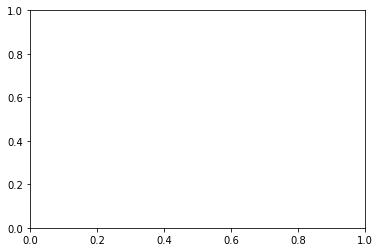

In [403]:
fig, ax = plt.subplots()
ls = ['solid', 'dashed', 'dashdot', 'dotted', '-' ,'--' ,'-.' , ':','None' ,' ' ,'' ]

subsetdata = df[(df.nsamples == 32) & 
              (df.thing == True) & 
              (df.maskblur == 2) & 
              (df.annealinglambda == 1.0) & 
              (df.dataset == "lung")].reindex()
for k,i in enumerate(sorted(subsetdata.maxmasks.unique())):

    thisdata = subsetdata[subsetdata.maxmasks == i]
    r = thisdata.groupby(["epoch"]).mean().plot(
        y="validauc", ax=ax, label=str(i), ls=ls[k])
    print (i, "num trials", thisdata.groupby(["epoch"]).count().min()[0])
    plt.legend(title="# masks used")
#plt.ylim(.65, 0.81);
plt.xlim(0,500);

plt.title("Vary maxmasks used, nsamples:" + str(thisdata.nsamples.unique()[0]) + 
          ", trials:" + str(thisdata.seed.unique().shape[0]));


AttributeError: 'DataFrame' object has no attribute 'thing'

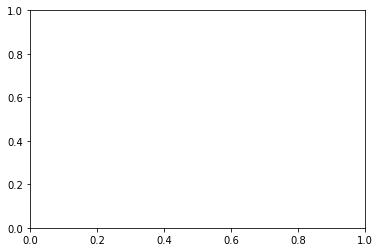

In [404]:
fig, ax = plt.subplots()
ls = ['solid', 'dashed', 'dashdot', 'dotted', '-' ,'--' ,'-.' , ':','None' ,' ' ,'' ]

subsetdata = df[(df.nsamples == 64) & 
              (df.thing == True) & 
              (df.maskblur == 3) & 
              (df.maxmasks == 64) & 
              (df.dataset == "lung")].reindex()
for k,i in enumerate(sorted(subsetdata.annealinglambda.unique())):

    thisdata = subsetdata[subsetdata.annealinglambda == i]
    r = thisdata.groupby(["epoch"]).mean().plot(
        y="validauc", ax=ax, label=str(i), ls=ls[k])
    print (i, "num trials", thisdata.groupby(["epoch"]).count().min()[0])
    plt.legend(title="annealinglambda")
#plt.ylim(.65, 0.85);
#plt.xlim(0,600);

plt.title("Vary annealinglambda, nsamples:" + str(thisdata.nsamples.unique()[0]) + 
          ", trials:" + str(thisdata.seed.unique().shape[0]));
